# Desafio Luizalabs
## Predição de Demanda
### Importando dados e fazendo a análise exploratória

In [1]:
import pandas as pd
import numpy as np

In [2]:
#Leitura da base de dados
data = pd.read_csv('/home/notbru/Documents/Luizalabs/desafio.csv')

In [3]:
# Checando informação das variáveis disponíveis
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179149 entries, 0 to 179148
Data columns (total 14 columns):
order_id            179149 non-null object
code                179149 non-null object
quantity            179149 non-null int64
price               179149 non-null float64
pis_cofins          179149 non-null float64
icms                179149 non-null float64
tax_substitution    179149 non-null float64
category            179149 non-null object
liquid_cost         179149 non-null float64
order_status        179149 non-null object
capture_date        179149 non-null object
process_date        179149 non-null object
process_status      179149 non-null object
source_channel      179149 non-null object
dtypes: float64(5), int64(1), object(8)
memory usage: 19.1+ MB


In [4]:
data.head()

,order_id,code,quantity,price,pis_cofins,icms,tax_substitution,category,liquid_cost,order_status,capture_date,process_date,process_status,source_channel
0,bcb59c839e78b2601374cbad9239ca7b,e6762ba2ffbca07ab6cee7551caeaad5,1,978.90,90.5483,0.0000,191.8416,4ece547755cba9e7fc14125bc895f31b,542.7065,entrega total,2016-06-11,2016-06-11,processado,b76eb9b8fc0f17098812da9117d3e500
1,4e91ee6b95895771dc9ee524e910a902,e6762ba2ffbca07ab6cee7551caeaad5,1,1036.29,95.8568,176.1693,0.0000,4ece547755cba9e7fc14125bc895f31b,542.7065,em rota de entrega,2016-06-11,2016-06-11,processado,b76eb9b8fc0f17098812da9117d3e500
2,88eb0ac86af1a521c0831298d22dea8b,e6762ba2ffbca07ab6cee7551caeaad5,1,978.90,90.5483,0.0000,191.8416,4ece547755cba9e7fc14125bc895f31b,542.7065,entrega total,2016-06-12,2016-06-12,processado,b76eb9b8fc0f17098812da9117d3e500
3,dee418152a36314b4aee6ce9cf94fcbf,e6762ba2ffbca07ab6cee7551caeaad5,1,978.90,90.5483,176.2020,0.0000,4ece547755cba9e7fc14125bc895f31b,542.7065,cancelado,2016-06-13,0000-00-00,captado,b76eb9b8fc0f17098812da9117d3e500
4,1c175bc61b9b659bbf011b2e5e3dcec6,e6762ba2ffbca07ab6cee7551caeaad5,1,976.05,90.2846,0.0000,192.3325,4ece547755cba9e7fc14125bc895f31b,542.7065,entrega total,2016-06-13,2016-06-13,processado,b76eb9b8fc0f17098812da9117d3e500


In [5]:
# convertendo a data de captura para o formato data
data['capture_date'] =  pd.to_datetime(data['capture_date'], format='%Y-%m-%d', errors='coerce')

# substituindo data zerada por missing e convertendo para formato data
data['process_date'] = data['process_date'].replace('0000-00-00', np.nan)
data['process_date'] =  pd.to_datetime(data['process_date'], format='%Y-%m-%d')

In [6]:
data['month'] = pd.DatetimeIndex(data['capture_date']).month
data['year'] = pd.DatetimeIndex(data['capture_date']).year
data['month_year'] = data['capture_date'].apply(lambda x: x.strftime('%m-%Y'))
data['month_year'] = pd.to_datetime(data['month_year'], format= '%m-%Y')

In [7]:
data.describe()

,quantity,price,pis_cofins,icms,tax_substitution,liquid_cost,month,year
count,179149.000000,179149.000000,179149.000000,179149.000000,179149.000000,179149.000000,179149.000000,179149.000000
mean,1.055278,234.638585,19.525329,25.095547,17.872443,136.034906,6.312254,2016.487728
std,0.597942,186.638919,17.402820,32.333226,28.125661,83.603243,3.651735,0.499851
min,1.000000,1.030000,0.000000,0.000000,0.000000,4.114100,1.000000,2016.000000
25%,1.000000,149.910000,10.640300,0.000000,0.000000,78.862100,3.000000,2016.000000
50%,1.000000,194.400000,17.519500,21.492000,0.000000,117.082000,6.000000,2016.000000
75%,1.000000,309.360000,28.157000,38.880000,30.403000,205.899700,10.000000,2017.000000
max,100.000000,19993.000000,1849.352500,3598.740000,280.834200,896.681400,12.000000,2017.000000


In [8]:
print('Número de categorias distintas: ', len(set(data['category'])))
print('Número de itens distintos: ', len(set(data['code'])))
print('Canais distintos: ', len(set(data['source_channel'])))

Número de categorias distintas:  11
Número de itens distintos:  131
Canais distintos:  16


In [9]:
# criando a variável de vendas totais e preço unitário
data['total_sales'] = data['price']
data['unit_price'] = data['price']/data['quantity']

# Visualização dos dados

In [10]:
import seaborn as sns
import matplotlib
import squarify
import missingno as msno
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

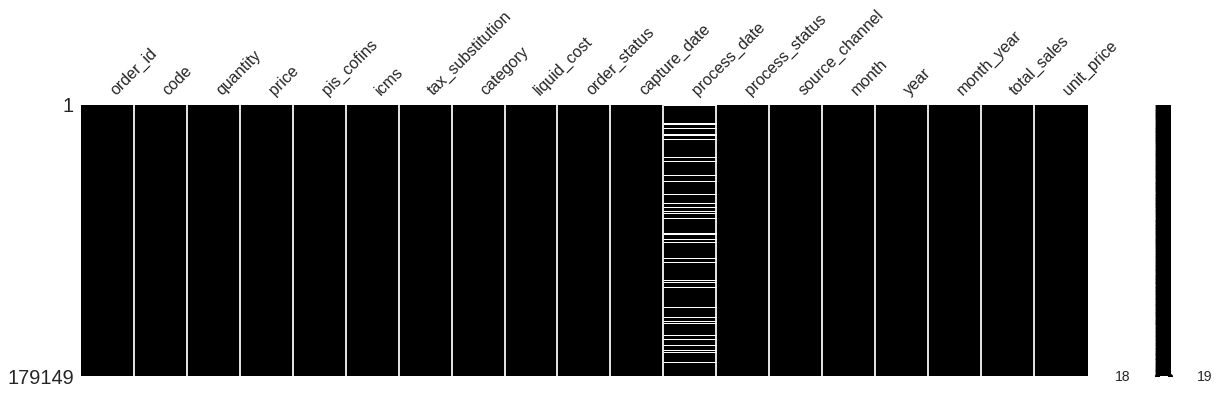

In [11]:
#Avaliando se a base contém dados faltantes
#A variável process_date apresentará missing dado o ajuste realizado anteriormente para converter o formato em data

msno.matrix(df=data, figsize=(20, 5), color=(0, 0, 0))

## Total de vendas por Status do pedido
### Há mais de 10% de pedidos cancelados por terem os boletos não pagos

In [12]:
# Base agregada pelo status do pedido - ordenada pela quantidade total
dataorder = data.groupby(['order_status']).sum().sort_values('quantity', ascending=False)
dataorder['order_status'] = dataorder.index
dataorder['Imp_order_status']=dataorder['quantity']/dataorder['quantity'].sum()

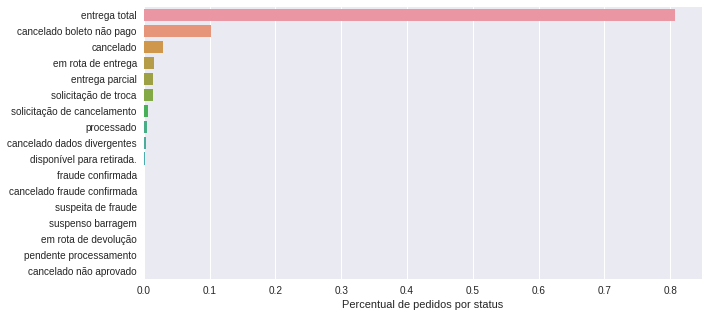

In [13]:
f, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x='Imp_order_status', y='order_status', data=dataorder)
ax.set(ylabel="", xlabel="Percentual de pedidos por status")

## Total de vendas por Canal
### Principal canal concentra mais de 45% das vendas

In [14]:
# Base agregada pelo status do pedido - ordenada pela quantidade total
datachannel = data.groupby(['source_channel']).sum().sort_values('quantity', ascending=False)
datachannel['source_channel'] = datachannel.index
datachannel['Imp_source_channel']=datachannel['quantity']/dataorder['quantity'].sum()
print('O principal canal responde por ', "{:.1%}".format(datachannel['Imp_source_channel'].head(1).sum()), 'das vendas em unidades')

O principal canal responde por  45.5% das vendas em unidades


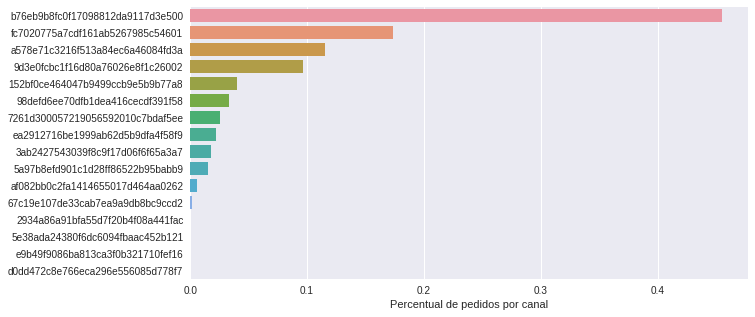

In [15]:
f, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x='Imp_source_channel', y='source_channel', data=datachannel)
ax.set(ylabel="", xlabel="Percentual de pedidos por canal")

## Total de venda por Categoria
### Mais de 85% das vendas em unidades são de uma categoria

In [16]:
# Base agregada pelo item - ordenada pela quantidade total
datacat = data.groupby(['category']).sum().sort_values('quantity', ascending=False)
datacat['category'] = datacat.index
datacat['Imp_cat']=datacat['quantity']/datacat['quantity'].sum()
print('Top 3 categorias respondem por ', "{:.1%}".format(datacat['Imp_cat'].head(3).sum()), 'das vendas em unidades')

Top 3 categorias respondem por  98.7% das vendas em unidades


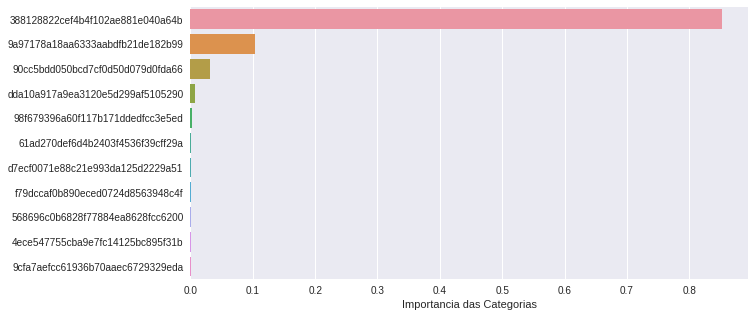

In [17]:
f, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x='Imp_cat', y='category', data=datacat)
ax.set(ylabel="", xlabel="Importancia das Categorias")

## Quantidade de itens por categoria
### A categoria 388128822cef4b4f102ae881e040a64b é a que apresenta maior número de itens, entretando a categoria 9a97178a18aa6333aabdfb21de182b99 tem a maior venda média por item.

In [18]:
datacode = data[['category','code','quantity']].groupby(['category','code']).sum()
datacode.groupby('category').agg(['sum','count','mean'])

quantity                   
                                      sum count         mean
category                                                    
388128822cef4b4f102ae881e040a64b   161141   106  1520.198113
4ece547755cba9e7fc14125bc895f31b       64     2    32.000000
568696c0b6828f77884ea8628fcc6200       71     2    35.500000
61ad270def6d4b2403f4536f39cff29a      203     1   203.000000
90cc5bdd050bcd7cf0d50d079d0fda66     5791     8   723.875000
98f679396a60f117b171ddedfcc3e5ed      378     3   126.000000
9a97178a18aa6333aabdfb21de182b99    19685     2  9842.500000
9cfa7aefcc61936b70aaec6729329eda       64     1    64.000000
d7ecf0071e88c21e993da125d2229a51      140     1   140.000000
dda10a917a9ea3120e5d299af5105290     1440     2   720.000000
f79dccaf0b890eced0724d8563948c4f       75     3    25.000000

In [19]:
datacode.sort_values('quantity', ascending=False).head(10)

quantity
category                         code                                      
388128822cef4b4f102ae881e040a64b 2e35421c34fb588ba40a0c57b3971d24     21723
9a97178a18aa6333aabdfb21de182b99 4534ea61b50410b3b6243e02b40c8cd1     18896
388128822cef4b4f102ae881e040a64b 3454ea52396a4cfd3fc37414d30c7b9c     11211
                                 32ceebf3efea1d04ace4183d20d4da5b      9085
                                 0671c2b9132a3f5215a4212ce0691694      6627
                                 5b7a30a9e6a43b170ad4d9e00d8d9359      6495
                                 d57911cca4b08f7b46417d952c0ca1dc      6274
                                 23056d85a1c9115cd021a6ad35c84aff      6119
                                 760693745e10b0c5e68c42214c729b0d      5034
                                 b08b7321c4db8f45a1a97a79d1e44dd8      4672

## Total de venda por item
### Os top 10 itens respondem por mais de 50% das vendas

In [20]:
# Base agregada pelo item - ordenada pela quantidade total
datacode = data.groupby(['code']).sum().sort_values('quantity', ascending=False)
datacode['code'] = datacode.index
datacode['Imp_code']=datacode['quantity']/datacode['quantity'].sum()
datacode10 = datacode.head(10)
print('Os top 10 itens respondem por ', "{:.1%}".format(datacode10['Imp_code'].sum()))

Os top 10 itens respondem por  50.9%


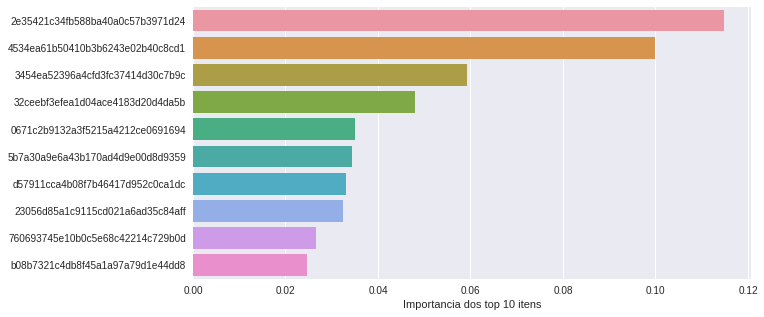

In [21]:
f, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x='Imp_code', y='code', data=datacode10)
ax.set(ylabel="", xlabel="Importancia dos top 10 itens")

## Gráficos de séries de tempo

In [39]:
datats = pd.crosstab(data.capture_date, data.category, data.quantity, aggfunc=sum)

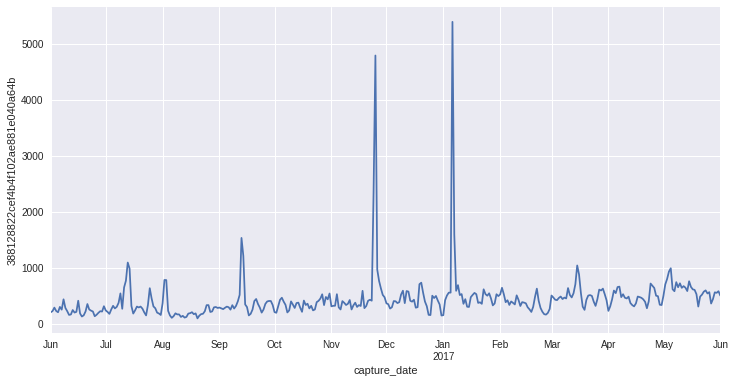

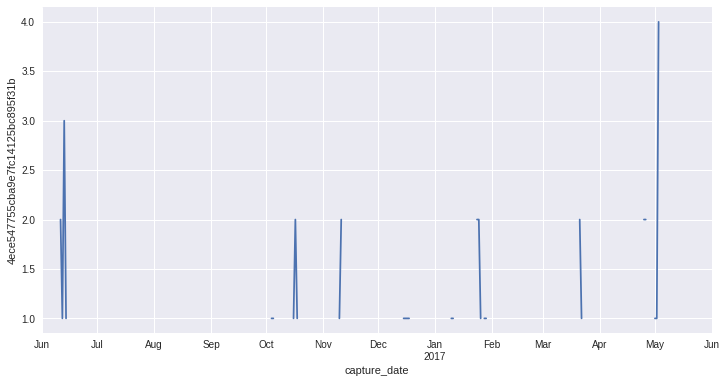

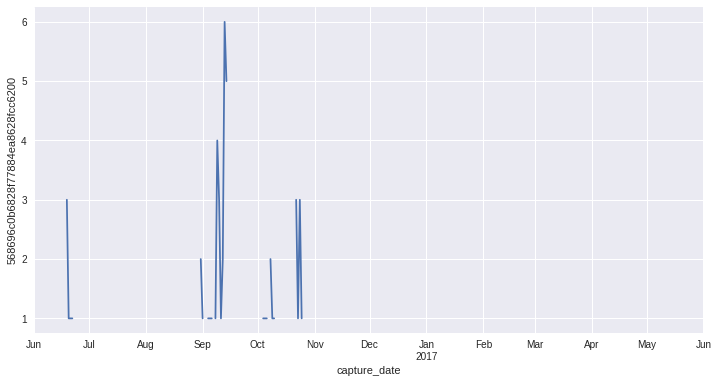

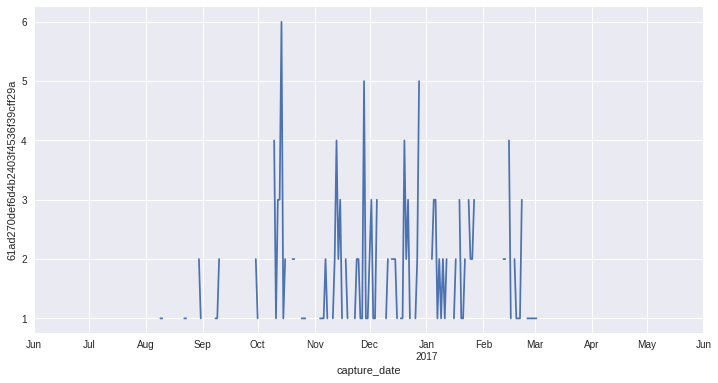

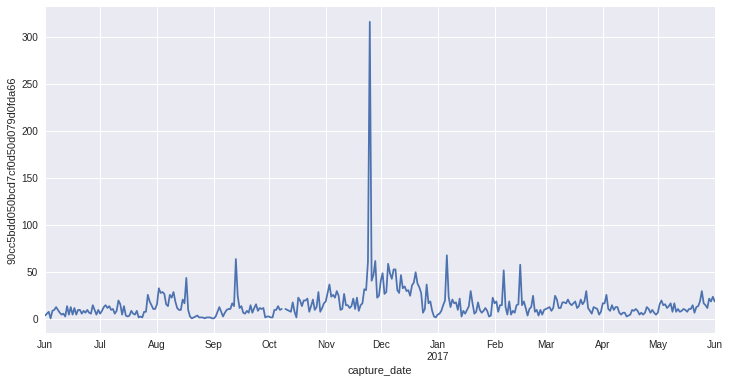

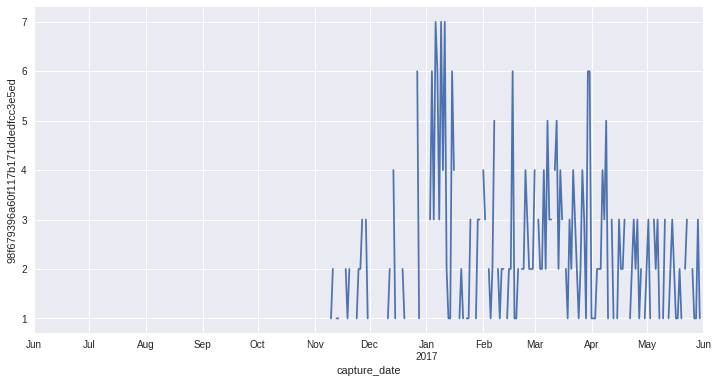

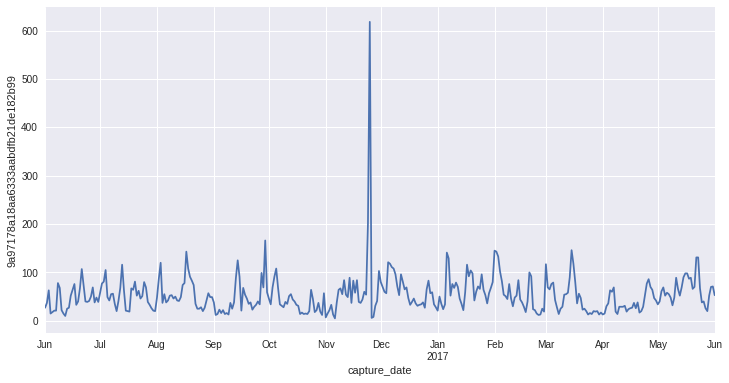

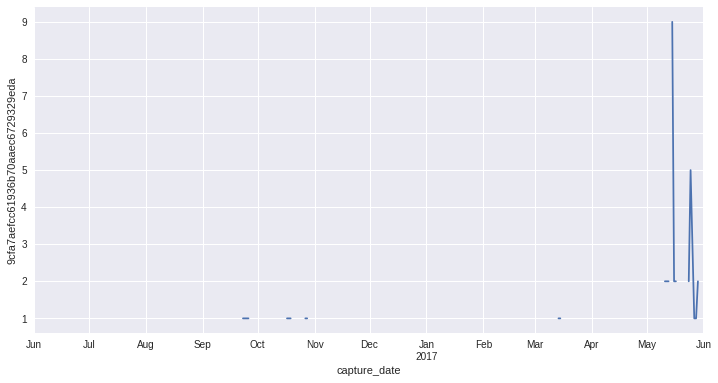

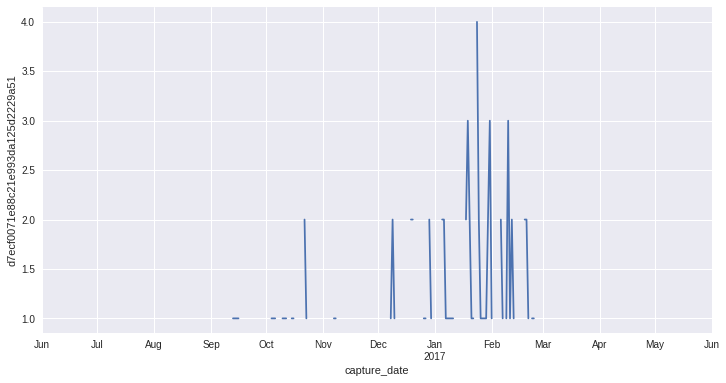

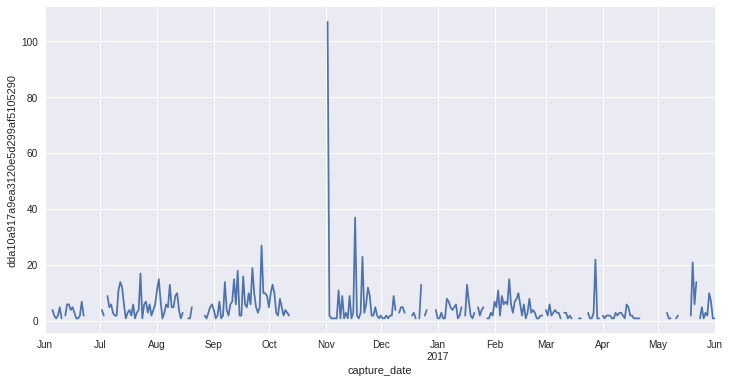

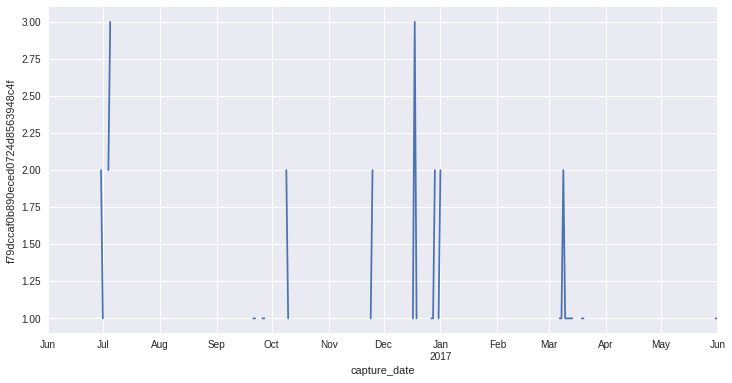

In [40]:
for i in datats.columns:
    plt.figure()
    datats[i].plot(figsize=(12, 6))
    plt.ylabel(i)

# Respondendo às perguntas do desafio
## a) Separação dos produtos em grupos, usando algoritimo não supervisionado de classificação

In [41]:
# Importando os pacotes a serem utilizados
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

## Estudando a segmentação por item (como observações) e datas como variáveis (Features)

In [42]:
# Transformando a base de dados para rodar a análise de cluster
# Neste caso usaremos a data como um feature e os itens como os exemplos
# Foi feita a substituição de missing por '-1'
dataclus = pd.crosstab(data.code, data.capture_date, data.quantity, aggfunc = sum).replace(np.NaN,0)
dataclus.head()

capture_date,2016-06-01 00:00:00,2016-06-02 00:00:00,2016-06-03 00:00:00,2016-06-04 00:00:00,2016-06-05 00:00:00,2016-06-06 00:00:00,2016-06-07 00:00:00,2016-06-08 00:00:00,2016-06-09 00:00:00,2016-06-10 00:00:00,...,2017-05-23 00:00:00,2017-05-24 00:00:00,2017-05-25 00:00:00,2017-05-26 00:00:00,2017-05-27 00:00:00,2017-05-28 00:00:00,2017-05-29 00:00:00,2017-05-30 00:00:00,2017-05-31 00:00:00,2017-06-01 00:00:00
code,,,,,,,,,,,,,,,,,,,,,
0671c2b9132a3f5215a4212ce0691694,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.0,14.0,17.0,11.0,16.0,11.0,14.0,17.0,16.0,11.0
09f544ec2a74c89abeec7b0590fc2d11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,1.0,4.0,9.0,1.0,1.0,3.0,7.0,5.0,4.0
0ad316f6b5cb5e81ebff73ae2490ccfe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,4.0,0.0,2.0,7.0,4.0,5.0,1.0,2.0,2.0
0bbe09e34a11e8e31cf49d6f8df2992d,0.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,3.0,1.0,...,0.0,2.0,0.0,1.0,0.0,0.0,1.0,2.0,1.0,1.0
0dca7ec6ba9b6e8f17f04f713a6be727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,2.0,5.0,1.0,2.0,0.0,1.0,2.0,2.0,2.0


In [43]:
# Definindo o melhor número de clusters
import random
random.seed(7)
distancia = []
K = range(1,130)
for k in K:
    km = KMeans(n_clusters=k).fit(dataclus)
    km.fit(dataclus)
    distancia.append(sum(np.min(cdist(dataclus, km.cluster_centers_, 'euclidean'), axis=1)) / dataclus.shape[0])

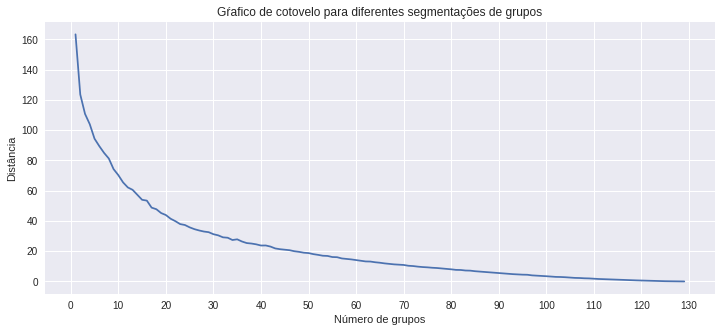

In [44]:
# Plotando o gráfico de cotovelo
plt.figure(figsize=(12,5))
plt.plot(K, distancia)
plt.xlabel('Número de grupos')
plt.ylabel('Distância')
plt.title('Gŕafico de cotovelo para diferentes segmentações de grupos')
plt.xticks(np.arange(0,140, 10))
plt.show()

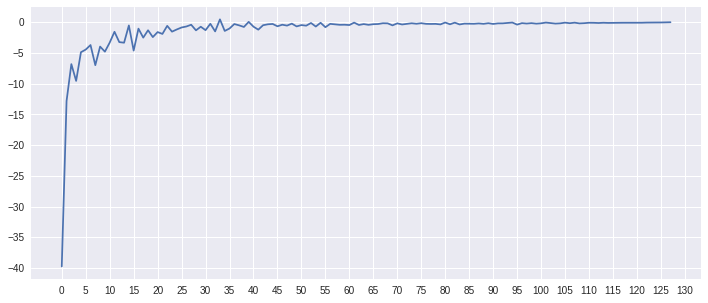

In [45]:
plt.figure(figsize=(12,5))
plt.plot([j-i for i, j in zip(distancia[:-1], distancia[1:])])
plt.xticks(np.arange(0, 131, 5))
plt.show()

### À partir de 11 clusters a distância dentro dos grupos passa a diminuir menos, indicando que esta segmentação poderia ser uma boa opção.

In [46]:
# Considerando que à partir de 11 clusters a distância média dentro dos clusters aumenta
# e depois volta a decrescer mais lentamente

kmeans = KMeans(n_clusters=11)

In [47]:
clus_data = pd.DataFrame.as_matrix(dataclus)

In [48]:
kmeans.fit(clus_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=11, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [49]:
dataclus.reset_index(inplace=True)
dataclus['cluster'] = kmeans.labels_

In [50]:
dataclus_f = pd.merge(data, dataclus[['code','cluster']], how='left', on=['code'])
dataclus_ts = dataclus_f.groupby(['category', 'code', 'capture_date', 'cluster']).sum()
dataclus_ts.reset_index(inplace=True)

### Avaliando o gráfico  de dispersão dos produtos por cluster se identificam grupos bem definidos

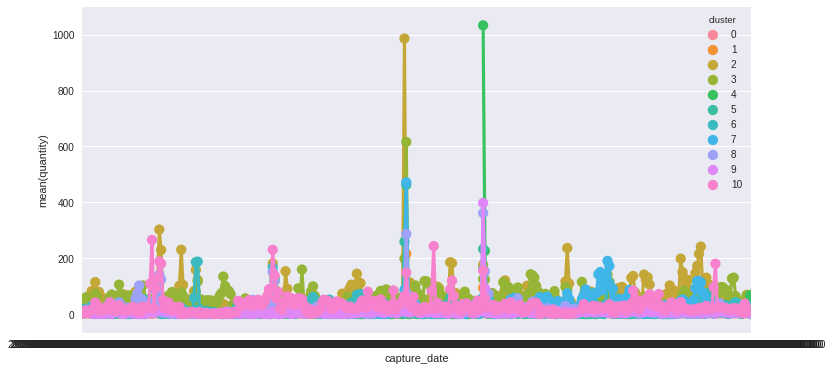

In [51]:
f, ax = plt.subplots(figsize=(12, 6))
ax = sns.pointplot(x='capture_date', y='quantity', hue='cluster', data=dataclus_ts, ci=None)

### Quantidade de produtos por cluster segue a seguinte distribuição:

In [52]:
datagroup=dataclus_f[['code','quantity','cluster']].groupby(['cluster','code']).sum()
datagroup.groupby('cluster').agg(['sum','count','mean'])

quantity                    
             sum count          mean
cluster                             
0          70990   114    622.719298
1          21190     4   5297.500000
2          21723     1  21723.000000
3          18896     1  18896.000000
4           2633     1   2633.000000
5           8381     2   4190.500000
6          14119     2   7059.500000
7           6627     1   6627.000000
8           6495     1   6495.000000
9           6787     3   2262.333333
10         11211     1  11211.000000

### Os menores itens ficaram agrupados no cluster 0, enquanto os demais itens, maiores, ficaram praticamente sozinhos ou em pequenos grupos

## Alocação dos volumes (Quantidade) por categoria e cluster

In [53]:
pd.crosstab(dataclus_f.category, dataclus_f.cluster, dataclus_f.quantity, aggfunc = sum)

cluster,0,1,2,3,4,5,6,7,8,9,10
category,,,,,,,,,,,
388128822cef4b4f102ae881e040a64b,61975.0,21190.0,21723.0,NaN,2633.0,8381.0,14119.0,6627.0,6495.0,6787.0,11211.0
4ece547755cba9e7fc14125bc895f31b,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
568696c0b6828f77884ea8628fcc6200,71.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61ad270def6d4b2403f4536f39cff29a,203.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90cc5bdd050bcd7cf0d50d079d0fda66,5791.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98f679396a60f117b171ddedfcc3e5ed,378.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9a97178a18aa6333aabdfb21de182b99,789.0,NaN,NaN,18896.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9cfa7aefcc61936b70aaec6729329eda,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d7ecf0071e88c21e993da125d2229a51,140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Gráfico das vendas por produto por cluster

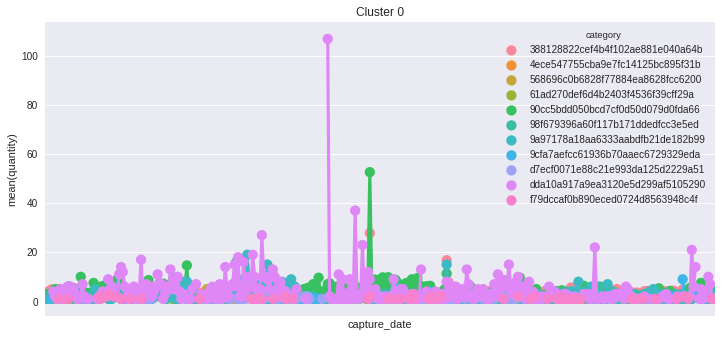

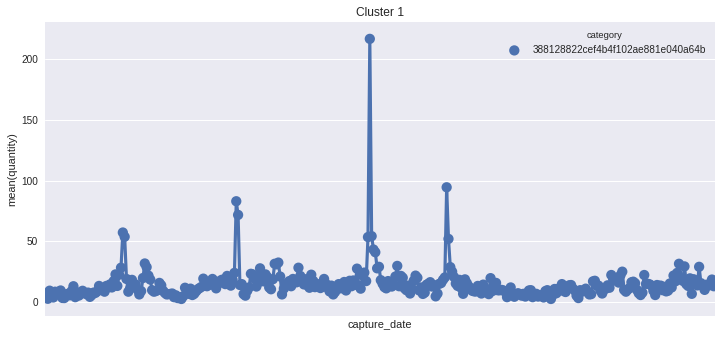

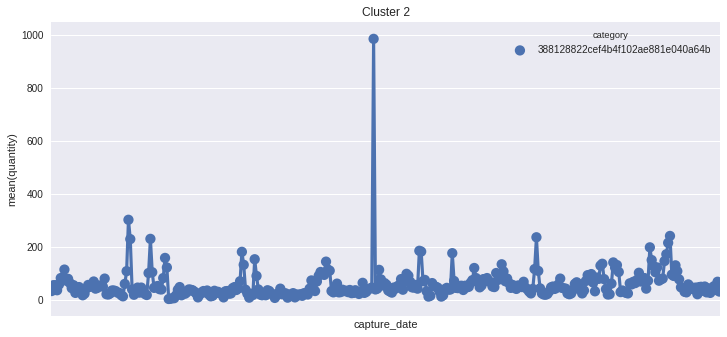

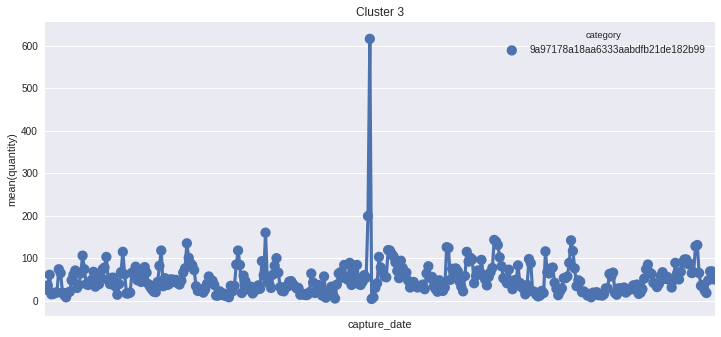

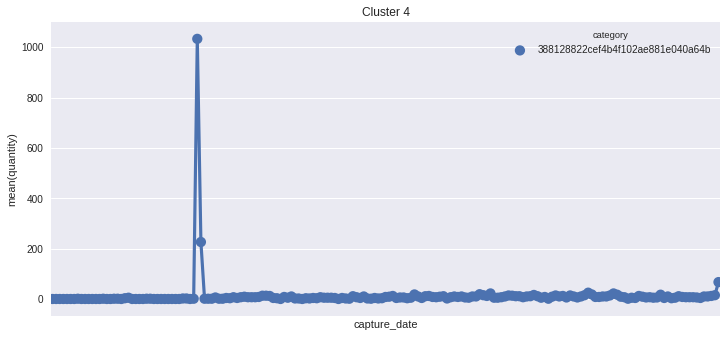

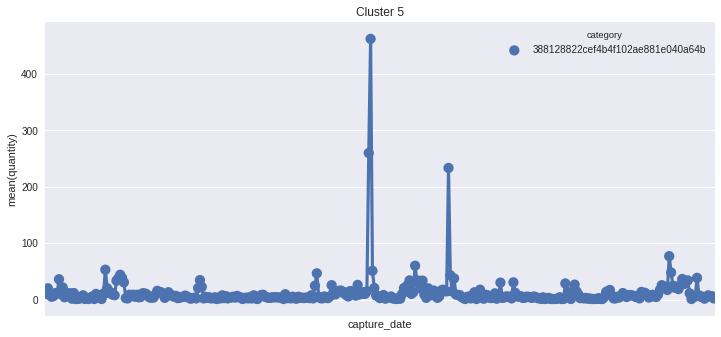

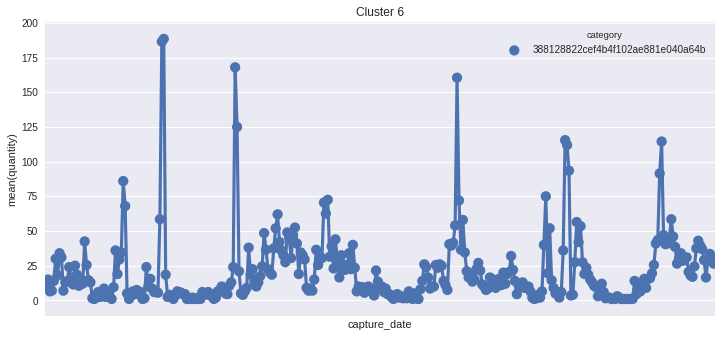

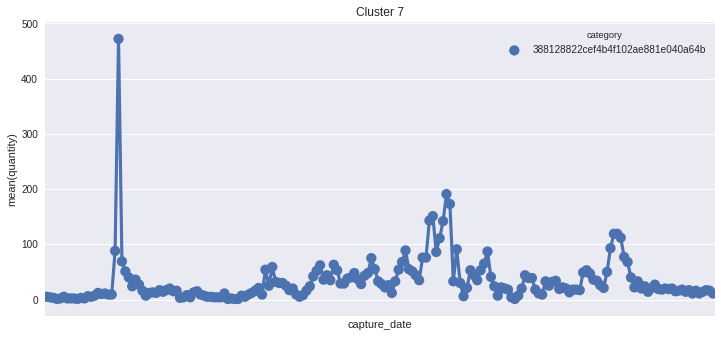

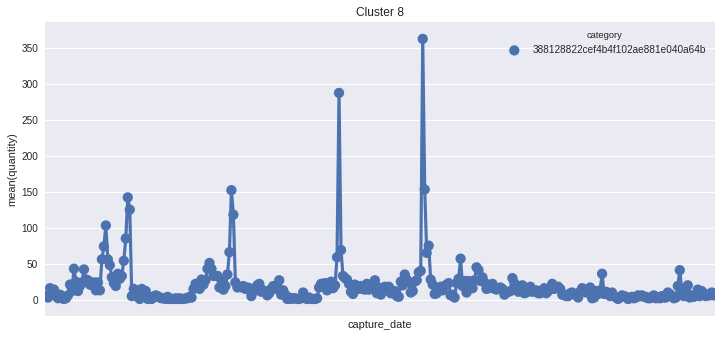

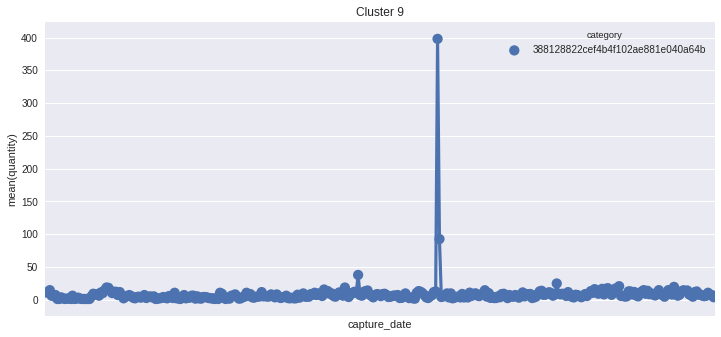

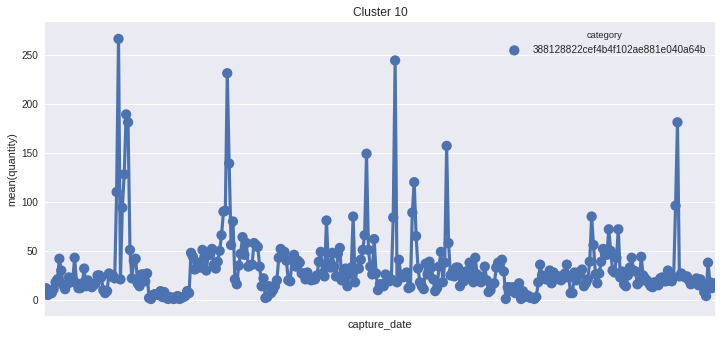

In [55]:
for i in np.unique(dataclus_ts['cluster']):
    f, ax = plt.subplots(figsize=(12, 6))
    ax = sns.pointplot(x='capture_date', y='quantity', hue='category', data=dataclus_ts[dataclus_ts['cluster']==i], ci=None)
    plt.title('Cluster '+str(i))
    f.autofmt_xdate()
    myFmt = matplotlib.dates.DateFormatter('%Y-%m-%d')
    ax.xaxis.set_major_formatter(myFmt)
    ax.xaxis.set_major_locator(matplotlib.dates.MonthLocator(interval=1))

### O cluster 0 concentra itens de todas categorias e em geral itens com vendas menores. O cluster 1 contém o maior item da categoria *9a97178a18aa6333aabdfb21de182b99* e os demais clusters são diferentes itens da maior categoria, a *388128822cef4b4f102ae881e040a64b*

## b) Previsão de vendas para os meses de junho, julho e agosto

### Limpando os itens cancelados da base

In [56]:
data = data[(data['order_status'] == 'entrega total') | (data['order_status'] =='em rota de entrega') | (data['order_status'] =='entrega parcial')]

In [57]:
data = data[(data['capture_date'] != '2017-06-01')]

In [58]:
dataclus_f = pd.merge(data, dataclus[['code','cluster']], how='left', on=['code'])
dataclus_ts = dataclus_f.groupby(['category', 'code', 'capture_date', 'cluster']).sum()
dataclus_ts.reset_index(inplace=True)

### Ajuste da base para a modelagem

In [59]:
dataprophet = pd.crosstab(dataclus_ts.capture_date, dataclus_ts.cluster, dataclus_ts.quantity, aggfunc=sum)

In [60]:
dataprophet.tail()

cluster,0,1,2,3,4,5,6,7,8,9,10
capture_date,,,,,,,,,,,
2017-05-27,169.0,32.0,26.0,21.0,4.0,3.0,52.0,12.0,9.0,14.0,5.0
2017-05-28,251.0,47.0,33.0,12.0,9.0,8.0,25.0,9.0,5.0,11.0,2.0
2017-05-29,294.0,39.0,46.0,32.0,10.0,14.0,48.0,8.0,6.0,19.0,29.0
2017-05-30,298.0,53.0,34.0,49.0,12.0,12.0,54.0,13.0,5.0,20.0,12.0
2017-05-31,285.0,64.0,61.0,52.0,16.0,11.0,55.0,12.0,10.0,16.0,9.0


## Gráfico das vendas por cluster

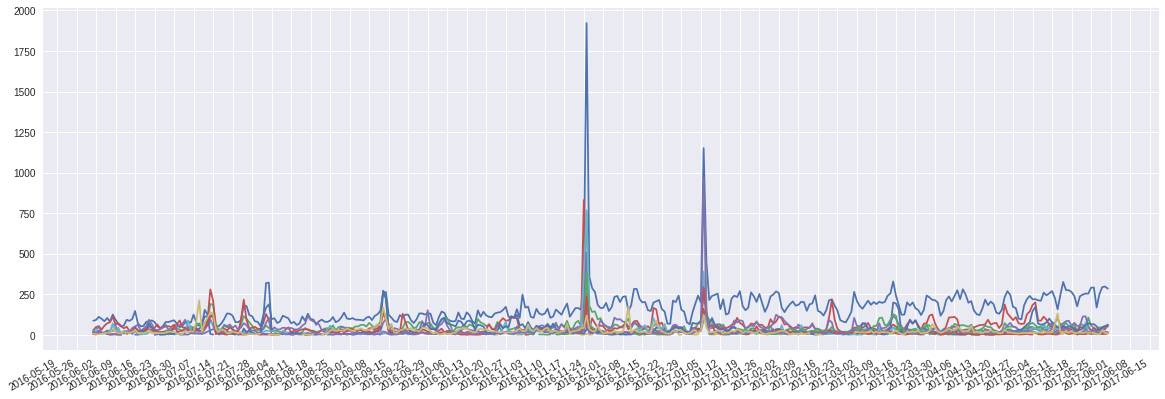

In [61]:
fig, ax = plt.subplots(figsize=(20,7))
ax.plot(dataprophet)
fig.autofmt_xdate()
myFmt = matplotlib.dates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(myFmt)
ax.xaxis.set_major_locator(matplotlib.dates.DayLocator(interval=7))
plt.show()

In [62]:
# Checando as datas "Outliers" de cada cluster
dataprophet[10].sort_values(ascending=False).head(10)

capture_date
2016-07-09    213.0
2016-12-10    177.0
2016-09-13    169.0
2016-07-13    141.0
2017-05-13    132.0
2016-07-14    127.0
2017-01-06    123.0
2016-11-25    119.0
2016-07-12    106.0
2016-09-14    103.0
Name: 10, dtype: float64

In [63]:
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation

In [64]:
bf = pd.DataFrame({
  'holiday': 'blackfriday',
  'ds': pd.to_datetime(['2016-11-25','2016-11-24']),
  'lower_window': 0,
  'upper_window': 1,
})
ny = pd.DataFrame({
  'holiday': 'newyear',
  'ds': pd.to_datetime(['2017-01-06','2017-01-07']),
  'lower_window': 0,
  'upper_window': 1,
})
events = pd.concat((bf, ny))

INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 19.0.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 23.0.
/home/notbru/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


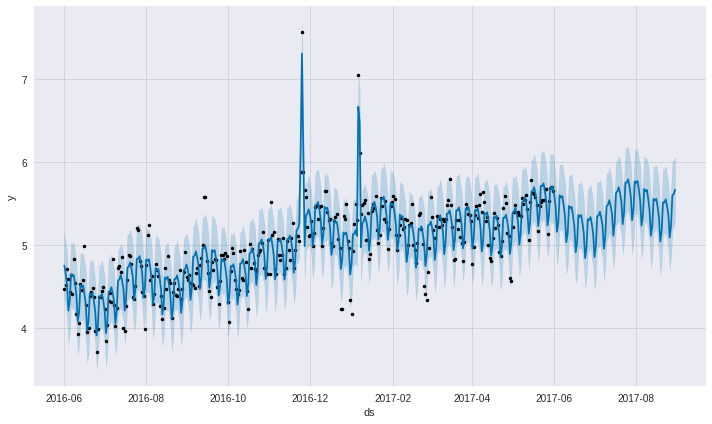

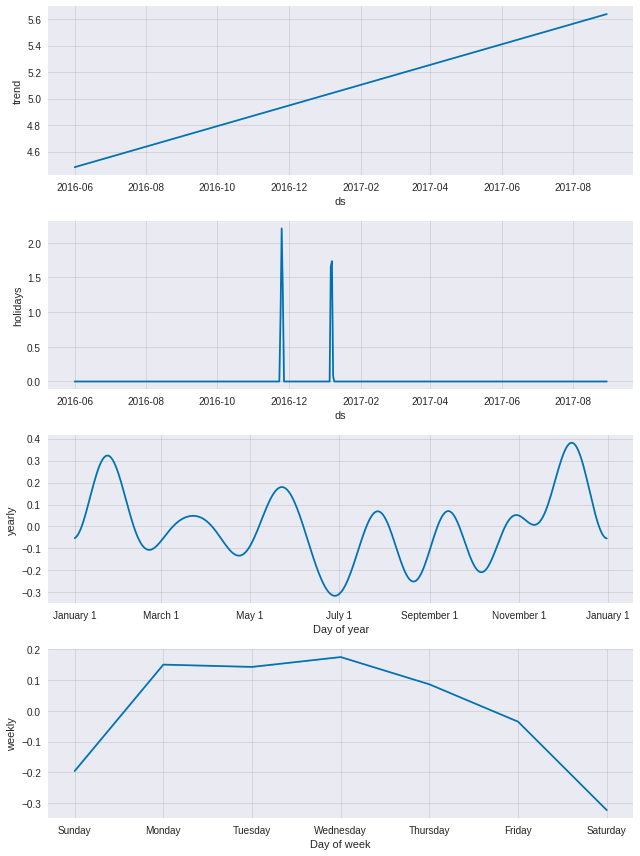

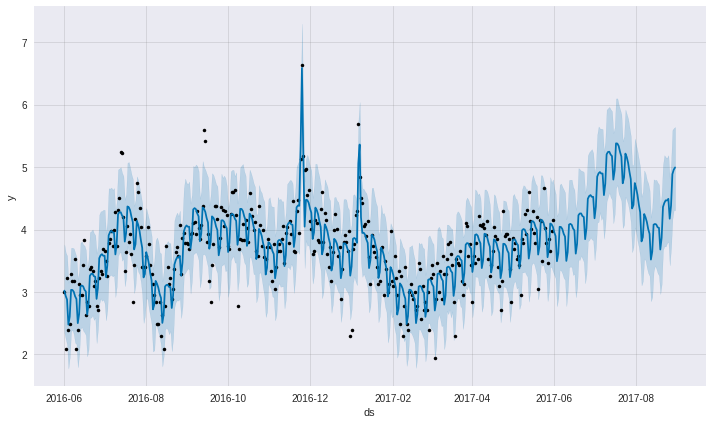

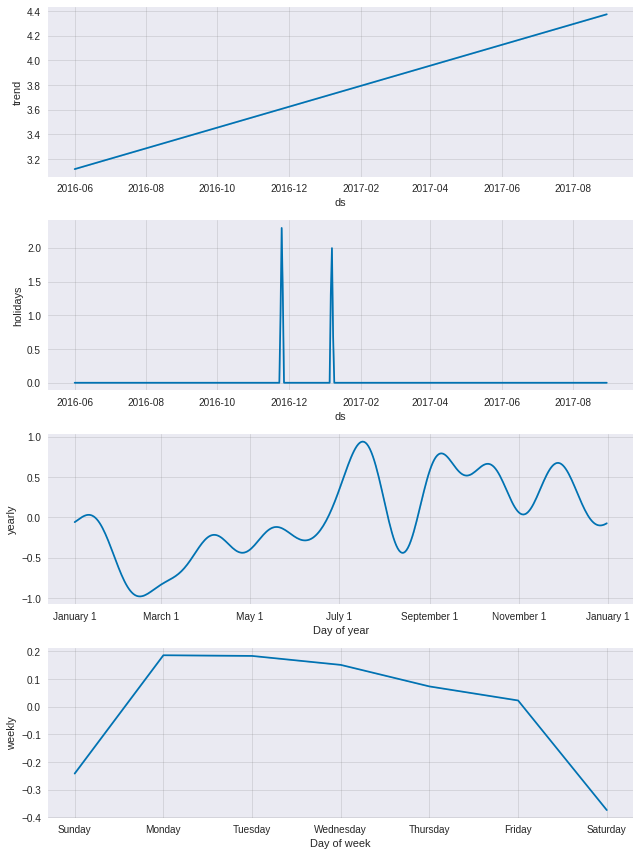

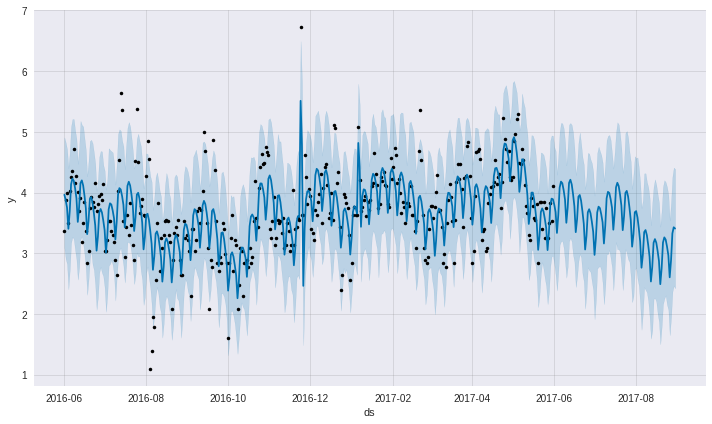

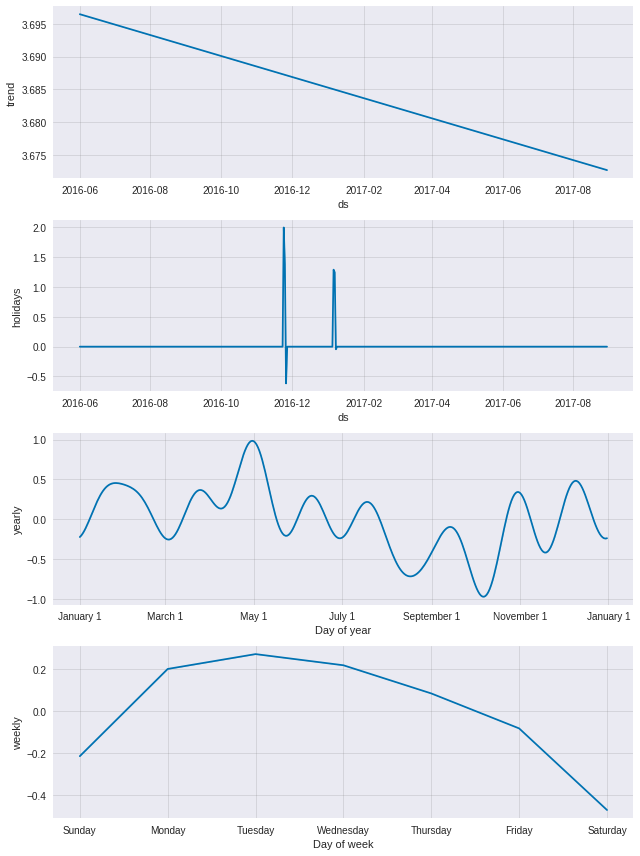

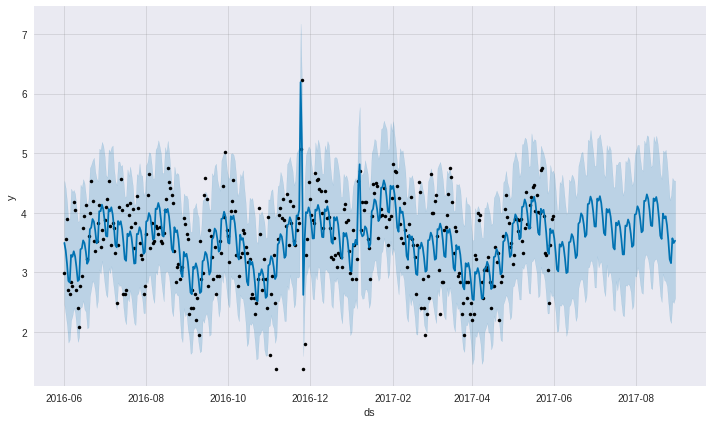

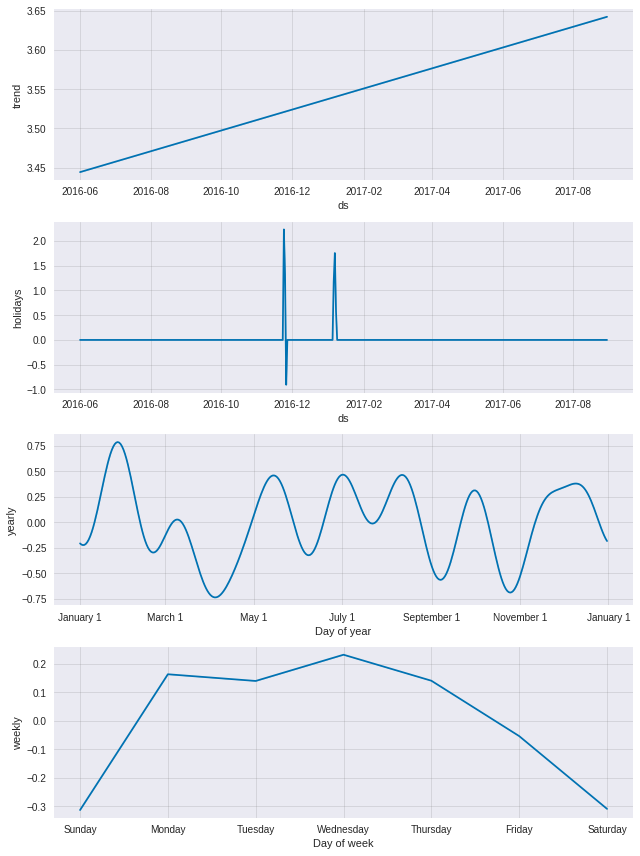

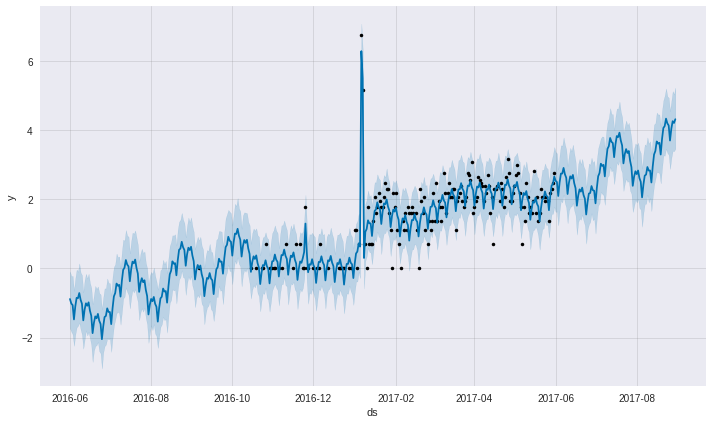

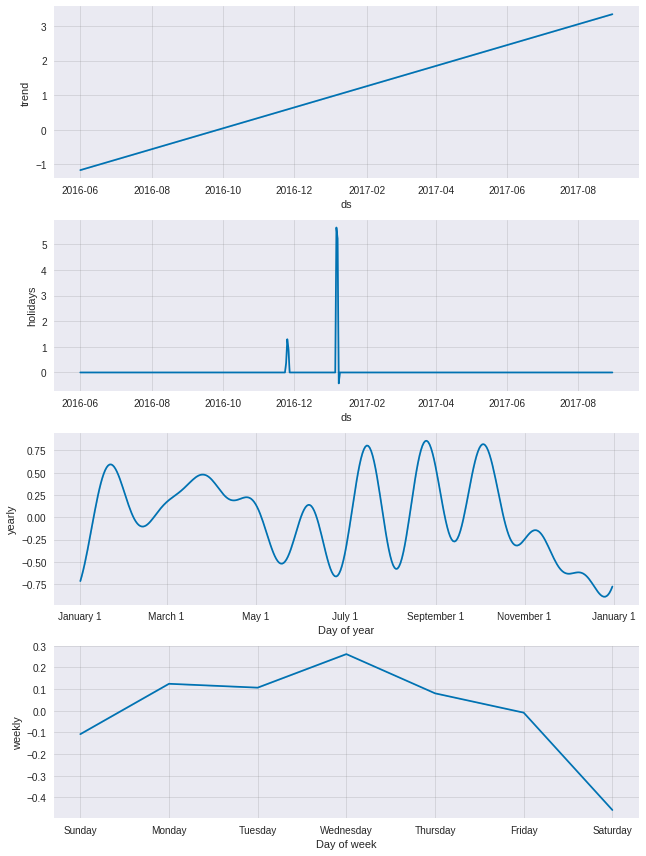

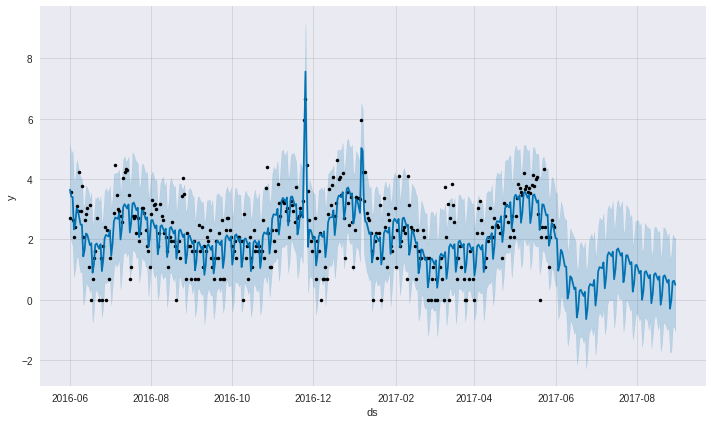

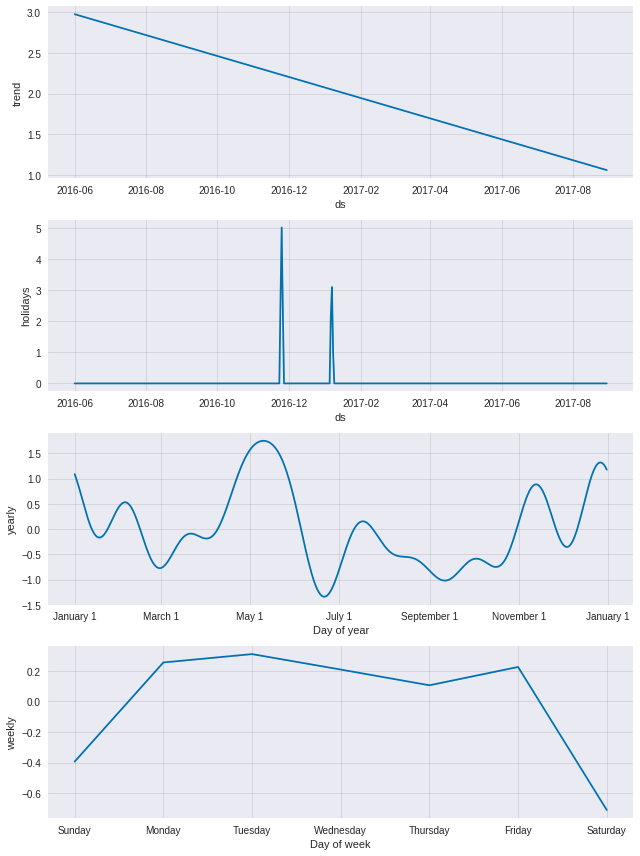

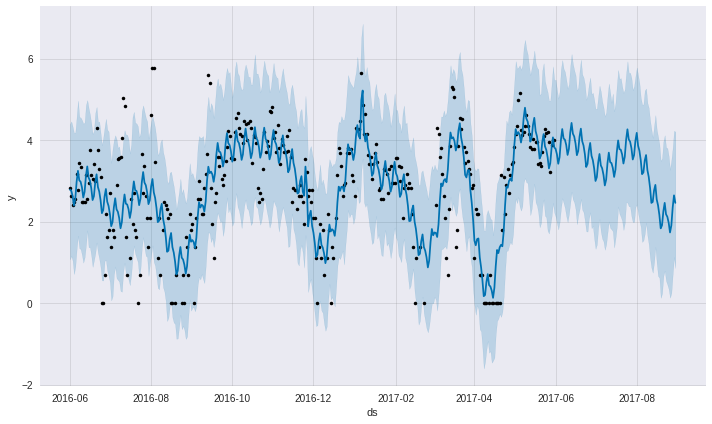

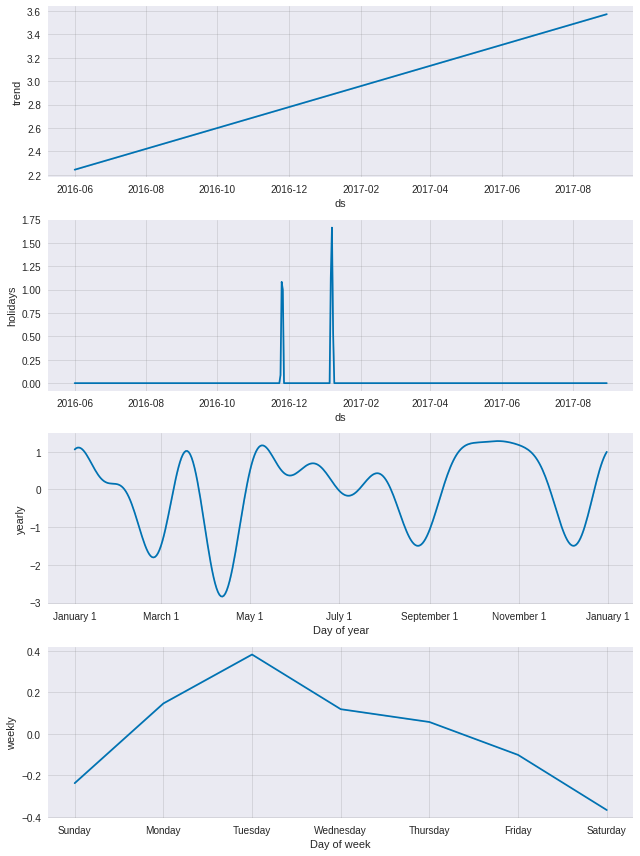

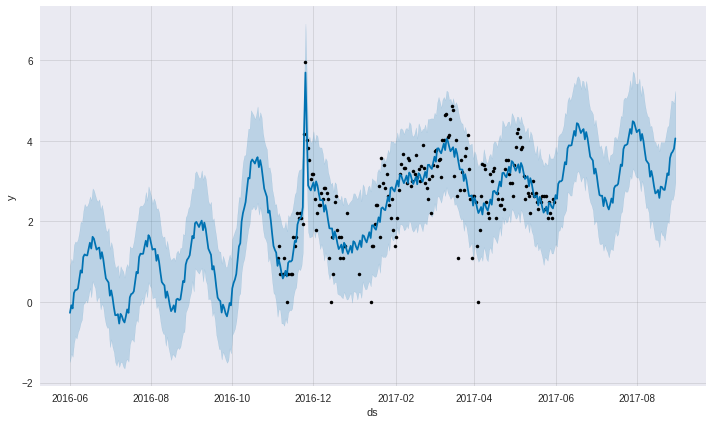

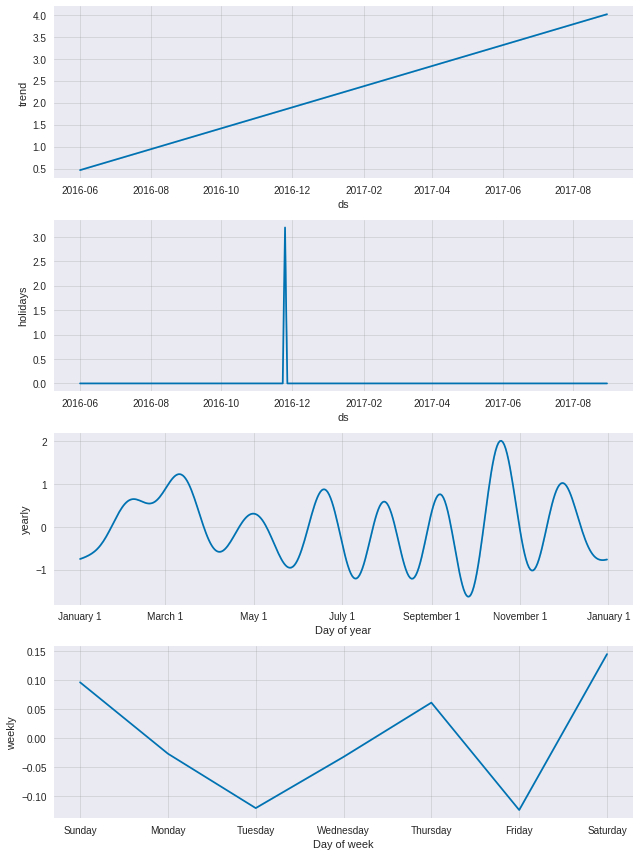

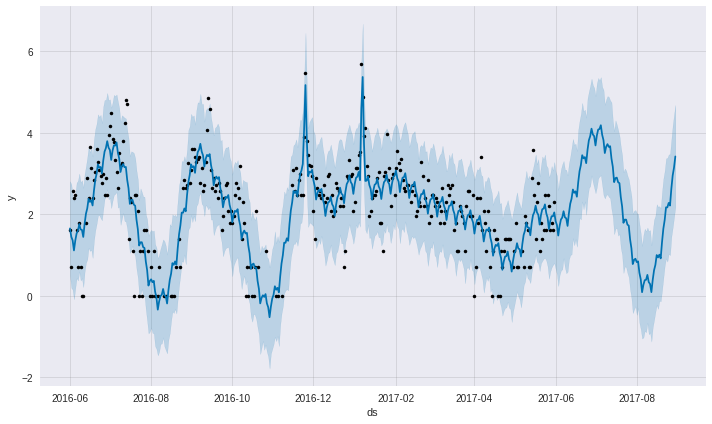

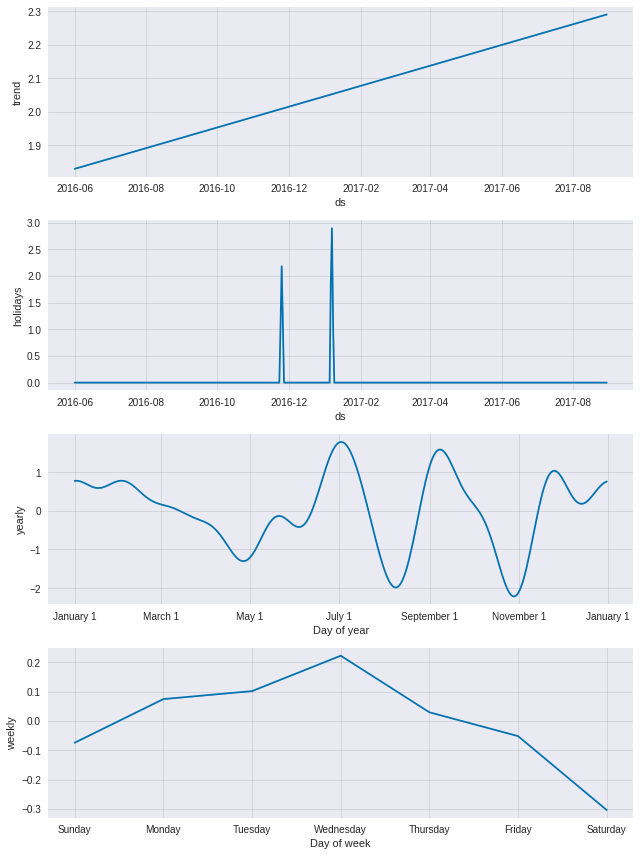

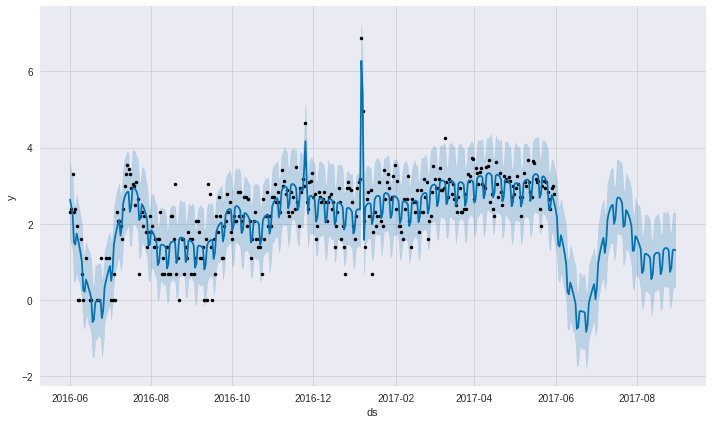

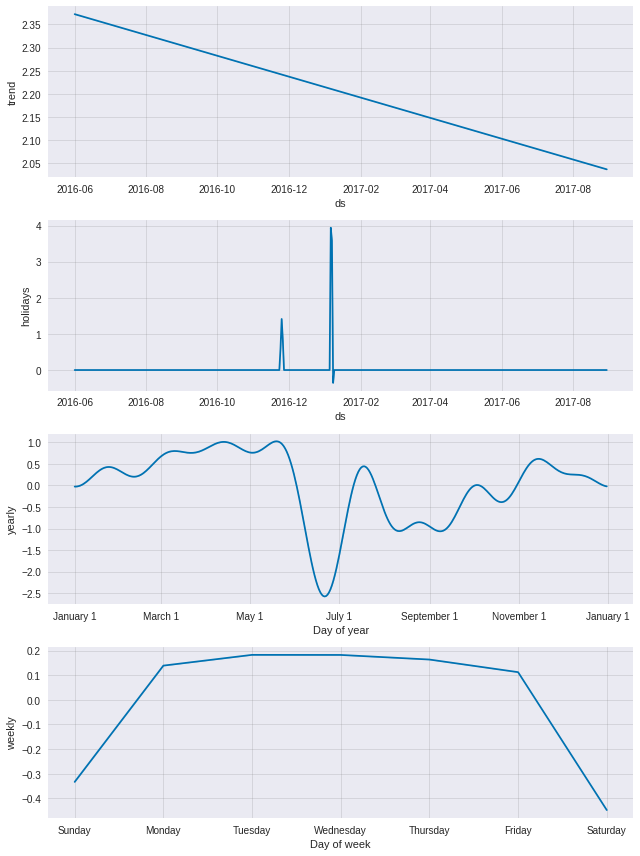

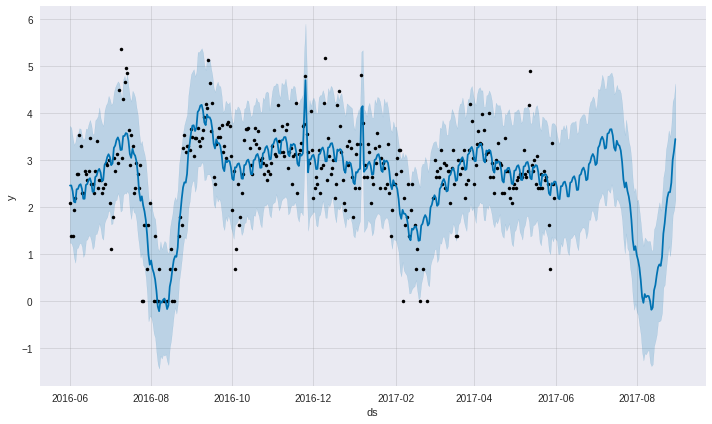

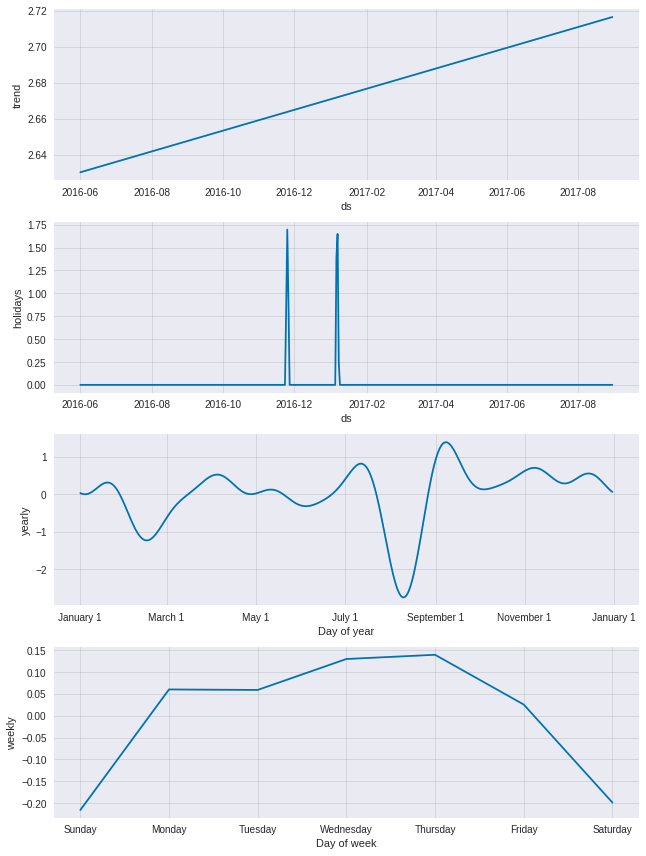

In [65]:
result={}
dataprophet_cv={}
error={}
for i in dataprophet.columns:
    x=pd.DataFrame(dataprophet[i])
    x.reset_index(inplace=True)
    x.columns = ['ds','y']
    x['y']=np.log(x['y'])
    m=Prophet(weekly_seasonality=True, yearly_seasonality=True, daily_seasonality=False, holidays=events, interval_width=0.95)
    m.fit(x)
    future=m.make_future_dataframe(periods=91)
    forecast = m.predict(future)
    m.plot(forecast)
    m.plot_components(forecast)
    result[i]=pd.merge(forecast[['ds', 'yhat_lower', 'yhat_upper','yhat']],x,how='left', on=['ds'])
    
    #Cross validation
    dataprophet_cv[i]=cross_validation(m, horizon = '31 days')
    

In [66]:
for i in range(0,len(result)):
    
    #convertendo os dados de volta para a unidade original
    result[i]['y']=np.exp(result[i]['y'])
    result[i]['yhat']=np.exp(result[i]['yhat'])
    result[i]['yhat_lower']=np.exp(result[i]['yhat_lower'])
    result[i]['yhat_upper']=np.exp(result[i]['yhat_upper'])

In [67]:
result_f={}
for i in range(0,len(result)):
    
    #Agrupando por mês
    result[i]['month_year']=result[i]['ds'].apply(lambda x: x.strftime('%m-%Y'))
    result[i]['month_year']=pd.to_datetime(result[i]['month_year'], format= '%m-%Y')
    result_f[i]=result[i].groupby('month_year').sum()
    result_f[i].replace(np.nan,0)


### Plotando os gráficos com valores originais (y), valor estimado (yhat) e limites de confiança superior (yhat_upper) e inferior (yhat_lower) - com 95% de confiança

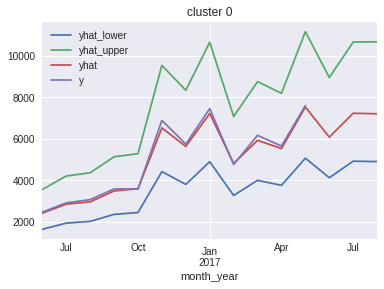

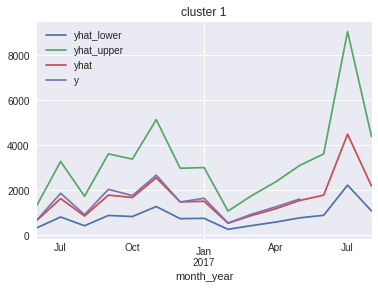

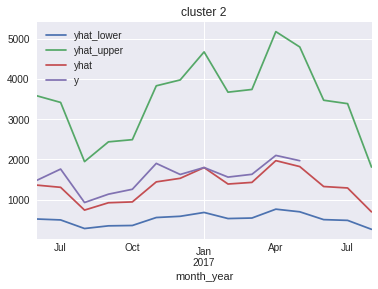

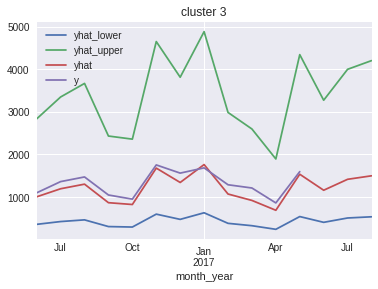

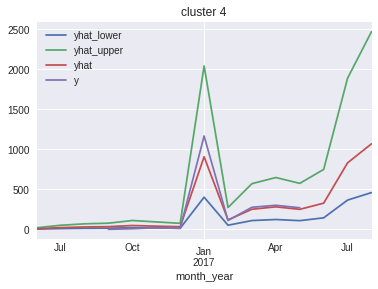

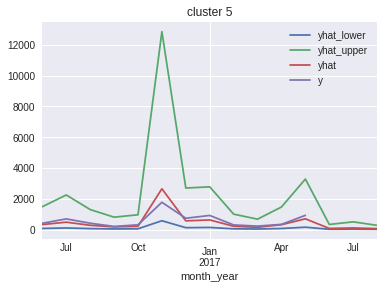

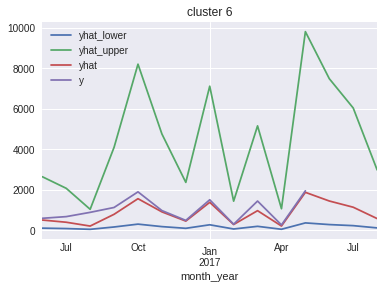

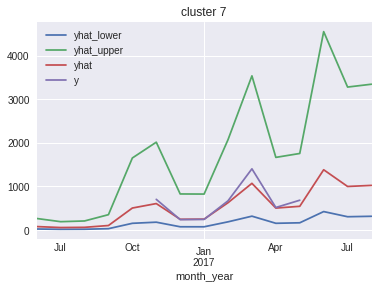

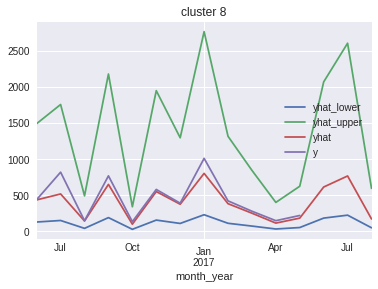

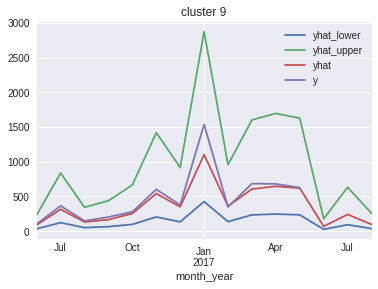

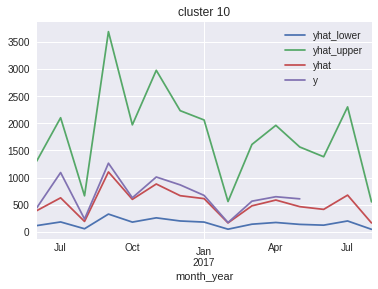

In [68]:
for i in range(0,len(result)):
        
    #plot
    plt.figure(figsize=(20,7))
    result_f[i].plot()
    plt.title('cluster '+str(i))
    plt.show()

In [69]:
from sklearn.metrics import mean_absolute_error

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [93]:
MAE={}
MAPE={}
for i in range(0,len(dataprophet_cv)):

    result_f[i].dropna(axis=0, inplace=True)
    MAE[i]=mean_absolute_error(result_f[i][0:11]['y'],result_f[i][0:11]['yhat'])
    MAPE[i]=mean_absolute_percentage_error(result_f[i][0:11]['y'],result_f[i][0:11]['yhat'])

In [94]:
MAPE

{0: 2.5501909937164959,
 1: 5.99440109102561,
 2: 14.27102769078502,
 3: 13.299932723079506,
 4: 455.46834389512856,
 5: 27.755751317398914,
 6: 23.914089810039041,
 7: 10.35700841565316,
 8: 13.739758466964707,
 9: 11.839298144532998,
 10: 14.798028738739513}

### Assim como mostram os gráficos, a estimativa realizada apresentam um erro razoável na maioría dos casos, com exceção do cluster 4, o qual possui poucos períodos para estimativa e os grupos 5,6 com erros de mais de 23%. Todos os demis grupos têm um erro menor a 15%

## c) Análise dos resultados encontrados

### Os dados fornecidos para esta análise estavam completos, não sendo necessária a aplicação de um método de imputação ou descarte de observações. Ainda assim, após as análises realizadas foram excluídas as compras canceladas, fraudes, entre outras opções que não caracterizavam a entrega total do produto (cerca de 10% de toda a base de dados), de forma a evitar a previsão de venda de um produto que não seria de fato realizado.

### Esta base de dados estava caracterizada pela presença de 11 categorias de produtos, 131 itens, vendidos em 16 diferentes canais de comercialização.

### Os itens e categorias apresentam uma grande dispersão, sendo que a categoria mais importante representa mais de 85% de todo volume (quantidade) vendido, concentrando também a maior parte dos itens do estudo. Os top 10 itens concentram mais de 50% do volume (Quantidade). Alguns itens aparentam ser mais sazonais, com períodos intermitentes de vendas. Muitos itens apresentam picos de vendas em momentos específicos do ano, como na Black Friday e no primeiro final de semana após a virada do ano (na liquidação anual do Magazine Luiza).

### Por conta desta dispersão e variabilidade entre os itens (produtos), foi considerado fazer um agrupamento por análise de cluster para usar usá-los na predição de demanda dos meses de Junho à Agosto 2017. Para esta análise foi utilizado o método Kmeans, modelando apenas as vendas em quantidade, a mesma variável que posteriormente seria utilizada para uma projeção de demanda através da aplicação de uma modelagem por séries temporais.

### Os dados foram arranjados de forma que tivessemos os itens como observações (Examples) e as datas de compra como variáveis (Features). Ao montar a tabela cruzada com as observações nas linhas e variáveis em colunas, os dados faltantes foram completados com 0 (venda igual a zero - ausência de vendas).

### A análise de cluster pelo Kmeans refere-se a um método de classificação no qual as observações são agrupadas de acordo com sua similaridade (neste caso, menor distância euclidiana das vendas). Espera-se que cada grupo seja homogêneo entre si e heterogêneo se comparado aos demais.

### Para definir o número ideal de clusters, utilizou-se o método do cotovelo (Elbow Method). Quando as distâncias entre as observações e seu respectivo cluster não apresentam uma redução significativa ao adicionar uma segmentação adicional, então este é um indicativo de que aumentar o número de clusters não deve ajudar a explicar melhor os grupos. Para este caso chegamos ao número ótimo de 11 grupos.

### Analisando os resultados, percebe-se que as categorias menores e mais esparsas ficaram agrupadas no cluster 0, juntamente com itens menores das categorias de maior relevância. Os maiores itens ficaram separados sozinhos ou em grupos menores.

### Após classificar os grupos passamos para a preparação da base para modelagem por séries temporais. Para esta tarefa foi utilizado o pacote fbprophet, desenvolvido pelo Facebook para projeções de forma mais rápidas e automatizadas (https://facebook.github.io/prophet/).

### Este pacote decompõe a série histórica em sazonalidades anuais, semanais, diárias e eventos especiais. Para nosso caso, dado que não havia diferenciação por hora do dia, não foi utilizada a decomposição diária. Entretanto, dado os claros eventos sazonais, como Black Friday e Liquidação anual Magazine Luiza, incluiram-se estas datas como eventos sazonais.

### Os modelos foram rodados considerando-se um intervalo de confiança de 95% e a previsão para três meses (91 dias), cubrindo a solicitação para fazer a previsão de demanda para os meses de Junho, Julho e Agosto de 2017.

### O pacote fbprophet traz a opção de gerar uma base de validação cruzada (Cross Validation), entretanto os resultados obtidos com o cálculo do MAPE mostram que os erros das estimativas são bastante altos (acima de 96%)mas isso para as estimativas de previsão diária. Olhando para as estimativas agregadas mensalmente notamos um MAPE bem menor, ficando apenas o grupo 4 comletamente inviável de se analisar. Os grupos 5 e 6 têm erros um pouco maiores e os demais apresentam erros menores a 15%.

### Para obter a estimativa de quanto comprar de cada item, podemos calcular a importância histórica de cada produto e distribuir o valor estimado proporcional a esta importância.

### Como próximos passos, seria aconselhável buscar metodologias alternativas como modelos VAR multivariados, modelos econométricos ou um maior estudo dos modelos apresentados para chegar em erros mais satisfatórios.